In [4]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
filepath = 'cereal.csv'

cereals = pd.read_csv(filepath)

# **Discovering**
**In this phase we familiarize ourselves with our data**

In [6]:
#View first rows too see what we are working on 
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [7]:
#View dataset summary about columns and rows
print("Dataset Columns and rows:", cereals.shape)
print("Dataset size:", cereals.size)

Dataset Columns and rows: (77, 16)
Dataset size: 1232


In [8]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [9]:
#Some Summary statistics
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


<Axes: title={'center': 'Overall Cereals Data Distribution'}, ylabel='Count'>

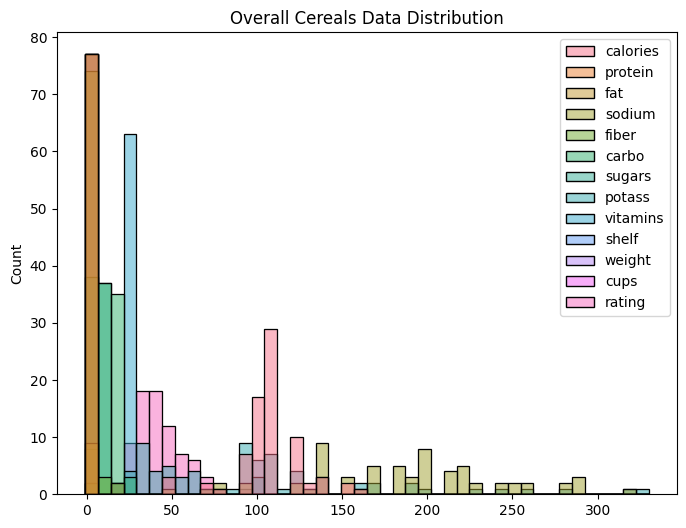

In [10]:
#Lets see the overall distribution of our data

plt.figure(figsize=(8,6))
plt.title("Overall Cereals Data Distribution")
sns.histplot(data = cereals)

**Our data appears to be right-skewed, indicating a positive skew in the data distribution. In the following sections of our notebook, we will create histograms for each variable to gain a deeper understanding of our data.**

# Structuring/Joining

**Our dataset appears to be well-structured, as evident from its Kaggle datacard page. It is easily organized, searchable, and suitable for analysis. In this notebook, we will further examine it for any missing data, duplicates, or outliers. So far, there are no issues with typos, column names, or data types.**

# Cleaning

**In this phase, we will now look for missing data, duplicates, or outliers.**

In [11]:
#Check for missing data
cereals.isnull().any()

name        False
mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass      False
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

**There are no, missing values using the isnull() function across all our columns. Now let's check for duplicates.**

In [12]:
cereals.duplicated().any()

False

**No duplicates were found in the dataset. Next, we will generate histograms to identify any unusual outliers within our variables.**

In [13]:
# Let's create a function so that we don't need to retype everything each plot
def plot_histogram(column_data, column_name):
    plt.figure(figsize=(5, 3))
    plt.title(f"Distribution of {column_name}")
    sns.histplot(column_data, kde=True) 
    plt.show()


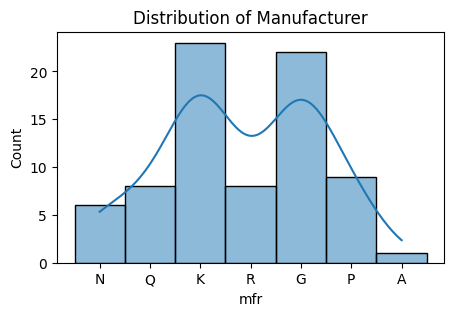

In [14]:
plot_histogram(cereals['mfr'], 'Manufacturer')

**The histogram reveals that Kellogs and General Mills are the primary cereal manufacturers in our dataset. This bimodal distribution indicates two prominent peaks, highlighting the dominance of these two manufacturers in our product range.**

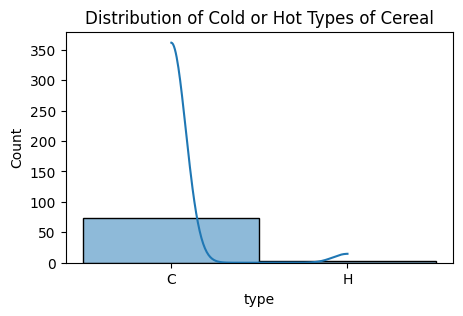

In [15]:
plot_histogram(cereals['type'], 'Cold or Hot Types of Cereal')

**Our analysis suggests that the majority of our cereals are designed to be served cold, with fewer options suitable for hot consumption.**

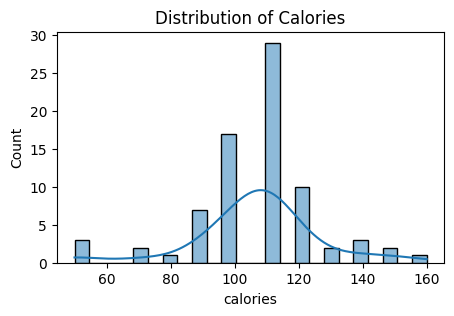

In [16]:
plot_histogram(cereals['calories'], 'Calories')

**The distribution of calories in our dataset exhibits a normal distribution, characterized by a bell-shaped curve. Most cereals in our dataset provide around 100-120 calories per serving.**

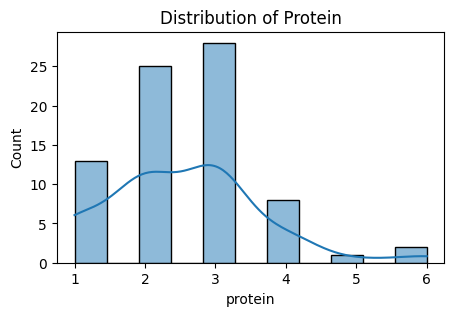

In [17]:
plot_histogram(cereals['protein'], 'Protein')

**The distribution of protein content among our products predominantly falls within the range of 2-3 grams, as indicated by our right-skewed histogram.**

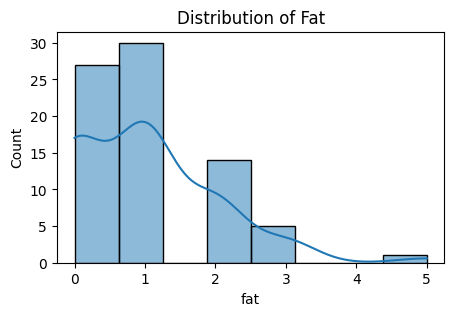

In [18]:
plot_histogram(cereals['fat'], 'Fat')

**The distribution of fat content per gram also exhibits a right-skewed pattern, with the majority of servings containing 0-1 gram. Some cereals have up to 5 grams of fat per serving, which, although slightly higher, does not qualify as an extreme outlier and does not significantly impact our analysis.**

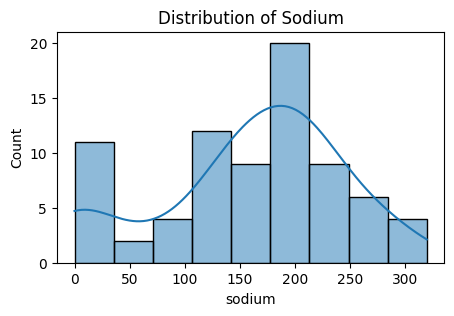

In [19]:
plot_histogram(cereals['sodium'], 'Sodium')

**For the contents of sodium, we can observe a normal distribution of our data, showing that 150-250 milligrams of servings for our cereals.**

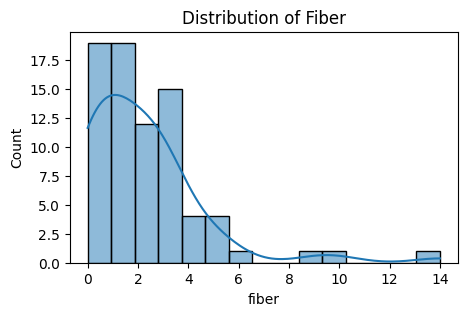

In [20]:
plot_histogram(cereals['fiber'], 'Fiber')

**The distribution of dietary fiber content in our cereals exhibits a positive skew in the histogram. Most cereals contain 0 to 6 grams of dietary fiber per serving, with some outliers providing as much as 14 grams of fiber.**

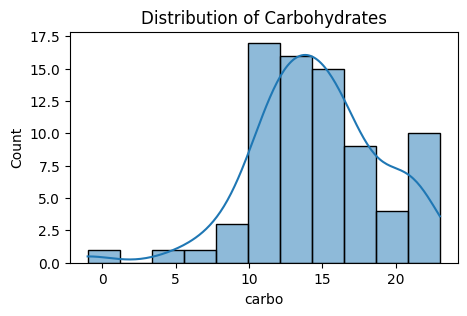

In [21]:
plot_histogram(cereals['carbo'], 'Carbohydrates')

**Regarding the distribution of carbohydrates in the dataset, it exhibits a left-skewed distribution or negative skewness. The majority of cereals offer approximately 10-20 grams of complex carbohydrates.**  

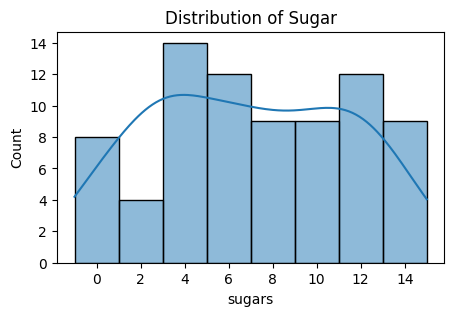

In [22]:
plot_histogram(cereals['sugars'], 'Sugar')

**In contrast, the distribution of sugar content in grams shows a uniform distribution, indicating an even distribution of sugar content across our cereals.**

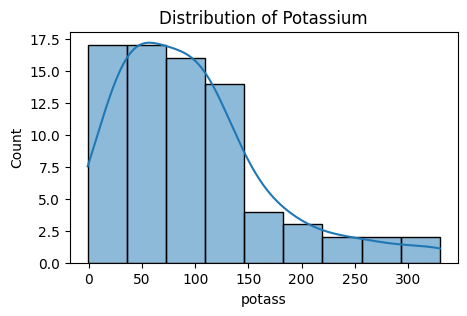

In [23]:
plot_histogram(cereals['potass'], 'Potassium')

**The distribution of potassium content in milligrams reveals a right-skewed distribution, with the majority of cereals containing 0-150 milligrams of potassium. However, there are some outliers with values as high as 300 milligrams.**

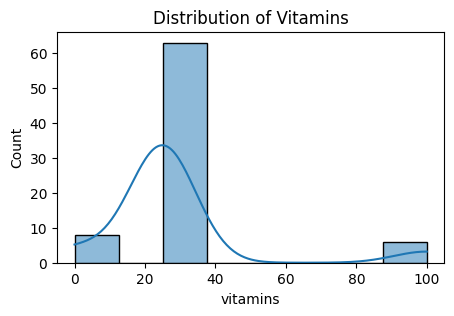

In [24]:
plot_histogram(cereals['vitamins'], 'Vitamins')

**In terms of vitamins, the vast majority of cereals contain either 0, 25, or 100 units. These values align with the typical recommended percentages outlined by the FDA on the data card.**

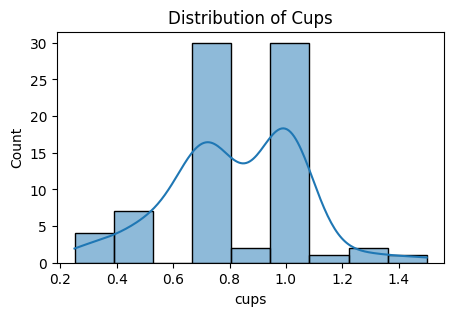

In [25]:
plot_histogram(cereals['cups'], 'Cups')

**When we examine the distribution of the number of cups per serving, our data reveals a bimodal distribution. This implies that the majority of cereals typically offer either 0.8 or 1 cup per serving.**

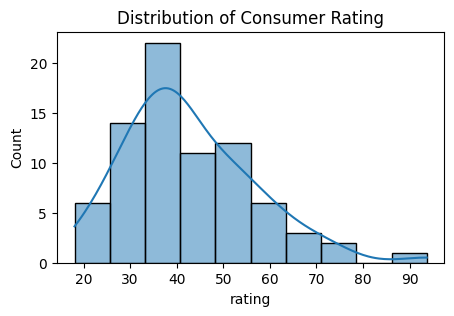

In [26]:
plot_histogram(cereals['rating'], 'Consumer Rating')

**The dataset reveals that the majority of cereals have ratings falling within the 30 to 40 point range. However, there are noteworthy outliers with ratings as high as 90 points, resulting in a right-skewed distribution.**

#### Outliers

**So far, our histograms have revealed the presence of outliers. However, it's important to note that these outliers do not represent extreme values and can be considered valid observations within our dataset. As a result, there is currently no immediate need to address them.** 

# Validation 

**Given the absence of missing values, duplicates, or extreme values in our dataset, which is already structured, there is no need for further checks in this phase of validation.** 

# Presenting and Showing Visualizations

**For this cereal dataset, let's create some questions that we might want to answer using visualizations to make it easier for us to convey our findings to the stakeholders.** 

- Which brand has the most highest ratings?
- Are there any relationships between sugar content and rating?
- Is there a relationship between fat content and calories?
- What are the most influential factors or features that contribute to the ratings of cereals in the Cereals80 dataset?

## Which brand has the most highest ratings?

<Axes: title={'center': 'Brands and Their Ratings'}, xlabel='name', ylabel='rating'>

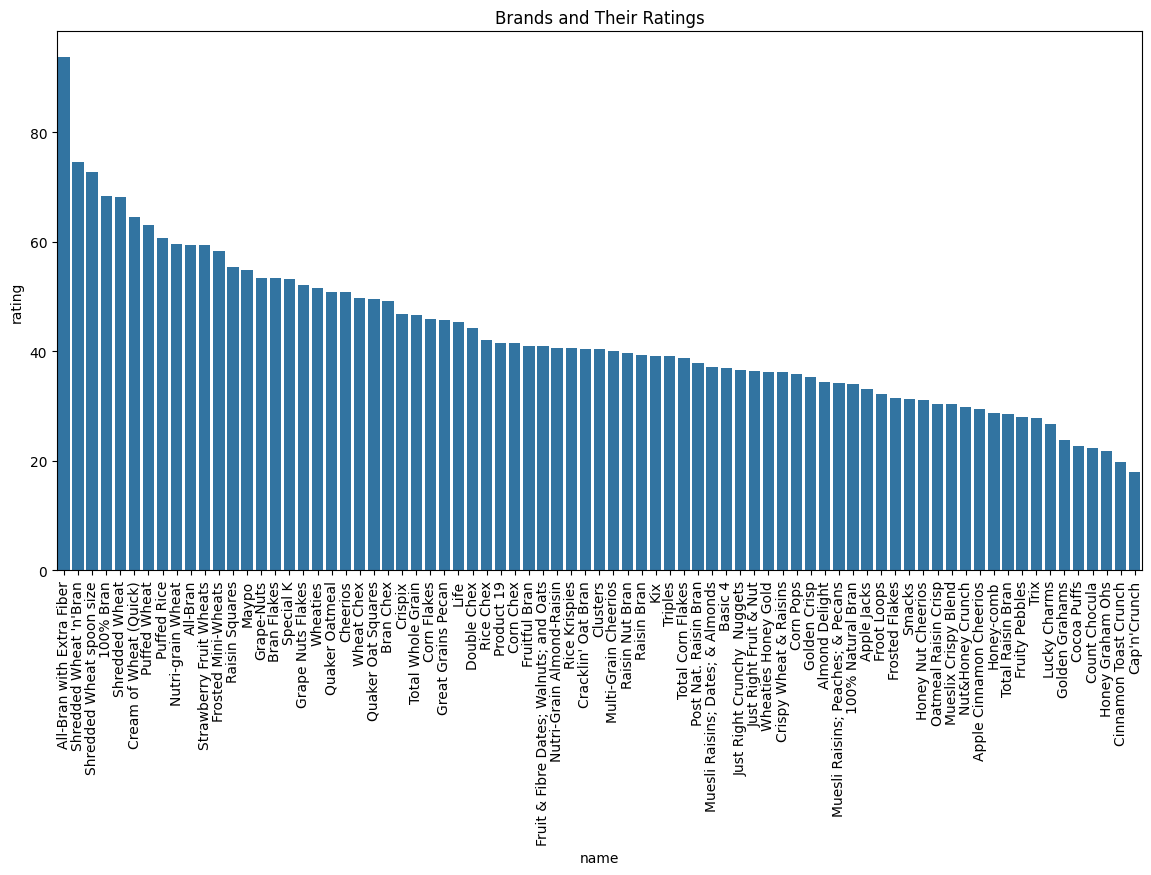

In [27]:
# Sort the DataFrame by rating in descending order
cereals_sorted = cereals.sort_values(by='rating', ascending=False)

plt.figure(figsize=(14, 7))
plt.title("Brands and Their Ratings")
plt.xticks(rotation=90)
sns.barplot(data=cereals_sorted, x=cereals_sorted['name'], y=cereals_sorted['rating'])

**Based on our barplot, it seems that the top five brands with the highest ratings are:**

1. All-Bran with Extra Fiber
2. Shredded Wheat 'n' Bran
3. Shredded Wheat Spoon Size
4. 100% Bran
5. Shredded Wheat


## Are there any relationships between sugar content and rating?



<Axes: title={'center': 'Relationship between Sugar Content and Rating'}, xlabel='sugars', ylabel='rating'>

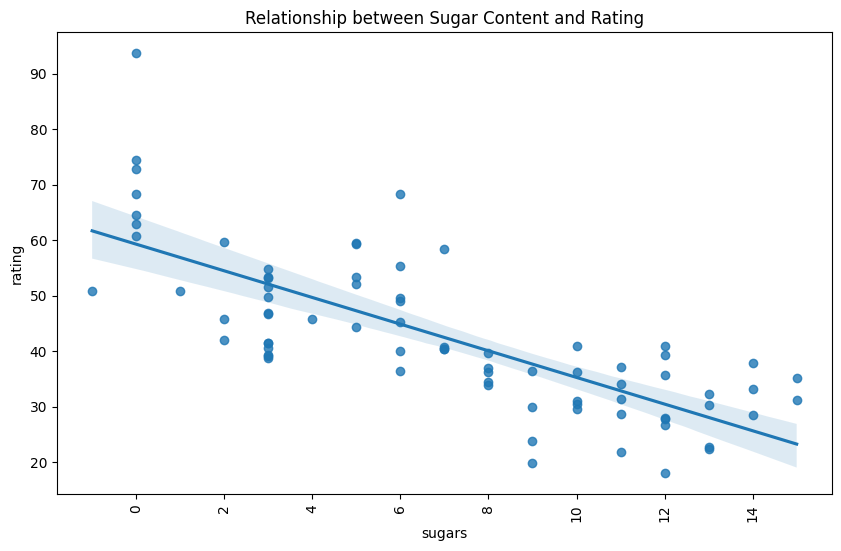

In [28]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=cereals, x=cereals['sugars'], y=cereals['rating'])

**According to our regression plot analysis, there appears to be a positive correlation between lower sugar content and higher cereal ratings.**

## Is there a relationship between fat content and calories?

<Axes: title={'center': 'Relationship between Sugar Content and Rating'}, xlabel='fat', ylabel='rating'>

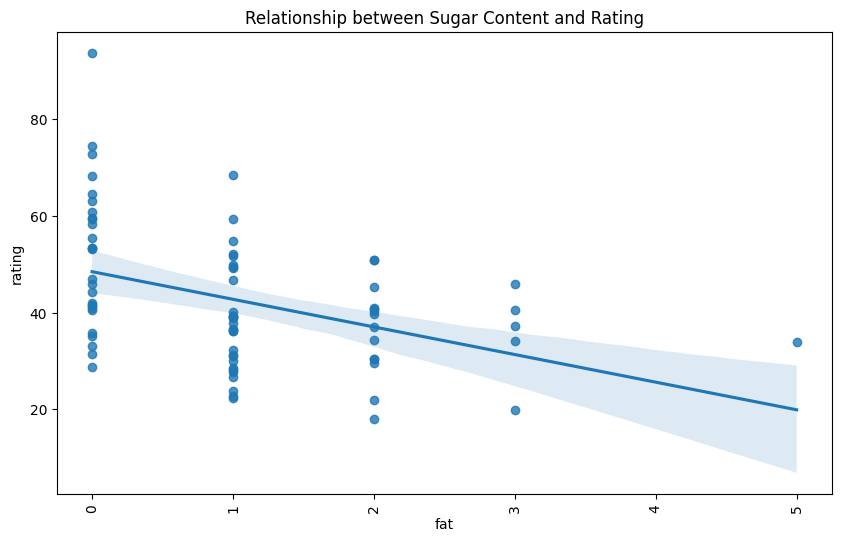

In [29]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=cereals, x=cereals['fat'], y=cereals['rating'])

**Based on our regression plot analysis, it suggests a positive correlation between lower fat content and higher cereal ratings. This observation implies that consumers may prioritize cereals with lower fat content when making purchasing decisions.**